[*********************100%***********************]  1 of 1 completed


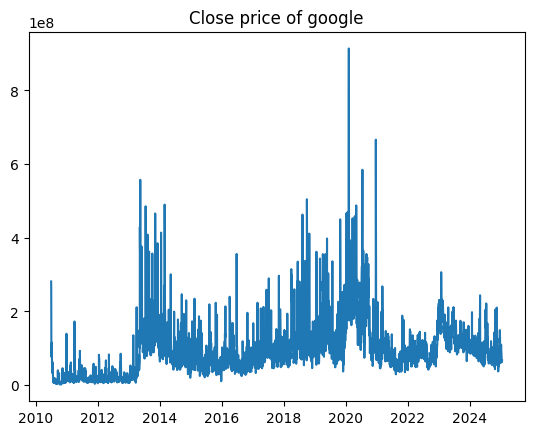

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

ticker = "TSLA"
data = yf.download(ticker)

plt.title("Close price of google")
plt.plot(data["Volume"])






In [4]:
import numpy as np

In [5]:
data=pd.read_csv("test.csv")
data.head()

,Date,Close,High,Low,Open,Volume
0,Date,NaN,NaN,NaN,NaN,NaN
1,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500.0
2,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500.0
3,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000.0
4,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000.0


In [6]:
data.info()
data.isnull().sum()
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3660 non-null   object 
 1   Close   3659 non-null   float64
 2   High    3659 non-null   float64
 3   Low     3659 non-null   float64
 4   Open    3659 non-null   float64
 5   Volume  3659 non-null   float64
dtypes: float64(5), object(1)
memory usage: 171.7+ KB


In [7]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 3659
Train data length : 2561
Validation data lenth : 1098


In [8]:
train_data = data[["Date", "Close"]][:length_train]
train_data.head()


,Date,Close
1,2010-06-29,1.592667
2,2010-06-30,1.588667
3,2010-07-01,1.464000
4,2010-07-02,1.280000
5,2010-07-06,1.074000


In [9]:
validation_data = data[["Date", "Close"]][length_validation:]
validation_data.head()

,Date,Close
1099,2014-11-06,16.081333
1100,2014-11-07,16.013332
1101,2014-11-10,16.128668
1102,2014-11-11,16.738667
1103,2014-11-12,16.606667


In [10]:
dataset_train = train_data.Close.values
dataset_train.shape

(2561,)

In [11]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(2561, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(2561, 1)

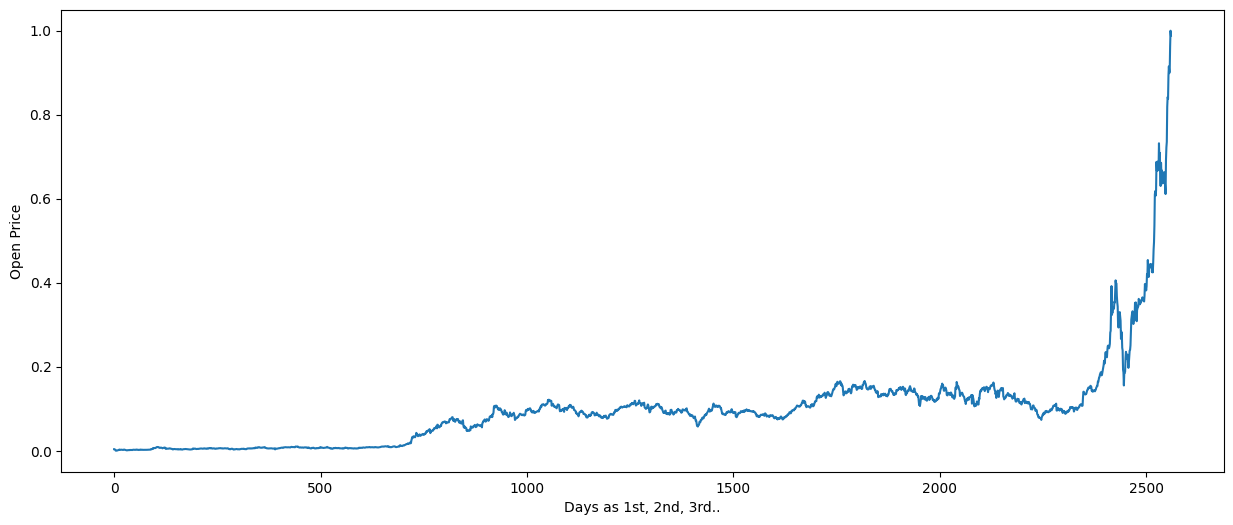

In [13]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

We have train data composed of stock open prices over days
So, it has 2561 prices corresponding 2561 days
To predict the close price of the next day using a time step of 50 days, use the first 50 open prices as X_train, predict the 51st price as y_train, then slide the window by one day, using prices from 1 to 51 for X_train and predicting the 52nd price as y_train, and repeat this process

In [14]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (2511, 50)
Shape of y_train before reshape : (2511,)


In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (2511, 50, 1)
Shape of y_train after reshape : (2511, 1)


In [17]:
X_train[0]

array([[0.00363931],
       [0.00361232],
       [0.00277109],
       [0.0015295 ],
       [0.00013946],
       [0.        ],
       [0.00074676],
       [0.00071977],
       [0.00056232],
       [0.00105265],
       [0.00181741],
       [0.0018399 ],
       [0.00217729],
       [0.0027486 ],
       [0.00202434],
       [0.00198835],
       [0.00233924],
       [0.00246969],
       [0.00231675],
       [0.0021368 ],
       [0.00221327],
       [0.00204683],
       [0.00186239],
       [0.00230325],
       [0.00276659],
       [0.0024562 ],
       [0.00209181],
       [0.00170494],
       [0.00170944],
       [0.00145303],
       [0.00094469],
       [0.00080973],
       [0.00113363],
       [0.00134056],
       [0.00150701],
       [0.00133606],
       [0.00134506],
       [0.00148451],
       [0.00194786],
       [0.0015295 ],
       [0.0018444 ],
       [0.00177692],
       [0.00175443],
       [0.0018309 ],
       [0.00165546],
       [0.00209181],
       [0.00236623],
       [0.002

In [18]:
y_train[0]
import warnings
warnings.filterwarnings('ignore')


In [20]:
from keras.layers import LSTM,Dense
from keras.models import Sequential
y_train = scaler.fit_transform(y_train)

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs =50, batch_size = 10)

Epoch 1/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 7.7750e-04 - loss: 0.0017
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0015 - loss: 3.9946e-04
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 3.9332e-04 - loss: 2.1123e-04
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 6.1231e-04 - loss: 2.3440e-04
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0011 - loss: 1.2511e-04
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 4.6607e-04 - loss: 1.8728e-04
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 4.9197e-04 - loss: 1.5162e-04
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0011 - loss: 1.1133e-04
Epoch 9/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 8.6690e-04 - loss: 1.1899e-04
Epoch 10/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 4.0215e-05 - loss: 1.1569e-04
Epoch 11/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy:

In [21]:
history2.history["loss"]

[0.0008835618500597775,
 0.0003150549018755555,
 0.0002840036468114704,
 0.00017346569802612066,
 0.00015408359467983246,
 0.00016215466894209385,
 0.00016181480896193534,
 0.00015641702339053154,
 0.00010778484283946455,
 0.00015446575707755983,
 0.00011761742644011974,
 0.00010006384400185198,
 9.378712275065482e-05,
 0.00011419042857596651,
 9.663825767347589e-05,
 8.754107693675905e-05,
 7.879993063397706e-05,
 0.00013975932961329818,
 0.00011169697972945869,
 8.857835928210989e-05,
 8.63185414345935e-05,
 8.829780563246459e-05,
 9.860495629254729e-05,
 8.429733861703426e-05,
 8.426599379163235e-05,
 8.412313036387786e-05,
 8.970240014605224e-05,
 9.713290637591854e-05,
 8.092863572528586e-05,
 7.620696851518005e-05,
 8.953793440014124e-05,
 0.00010350154479965568,
 8.107923349598423e-05,
 8.311941928695887e-05,
 8.389132563024759e-05,
 7.918498158687726e-05,
 7.009124965406954e-05,
 7.763448229525238e-05,
 8.293842984130606e-05,
 7.903703954070807e-05,
 5.723390495404601e-05,
 0.0

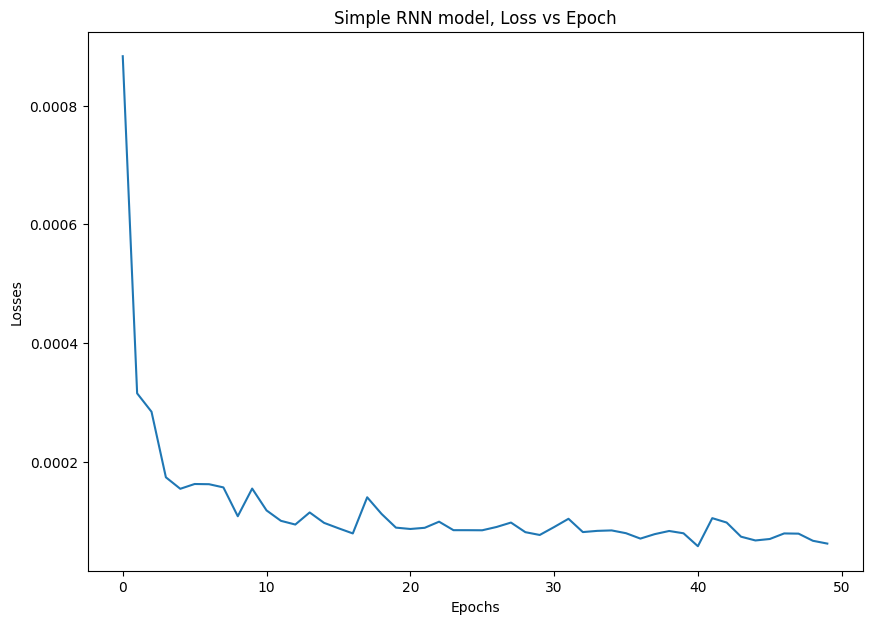

In [22]:
plt.figure(figsize =(10,7))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [37]:
dataset_validation = validation_data.Close.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (2561, 1)


In [50]:
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [51]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [52]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)
y_test = np.reshape(y_test, (-1,1))



Shape of X_test before reshape : (1048, 50)
Shape of y_test before reshape : (1048,)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


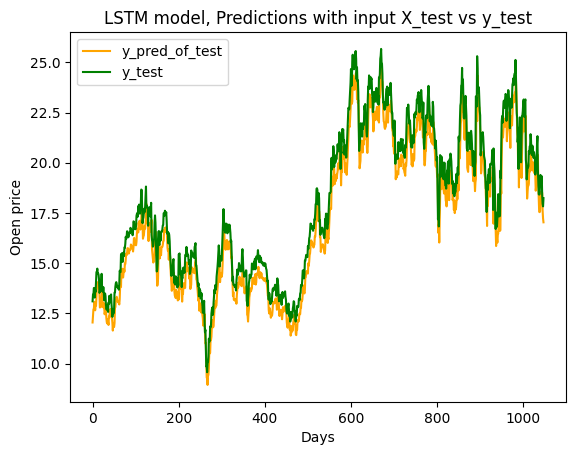

In [54]:

plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [152]:
data.iloc[-1]

Date      2025-01-13
Close     403.309998
High      403.790009
Low       380.070007
Open      383.209991
Volume    66525600.0
Name: 3659, dtype: object

In [153]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.05826926],
        [0.05805305],
        [0.03233334],
        [0.        ],
        [0.01201694],
        [0.17338124],
        [0.1916228 ],
        [0.23592988],
        [0.43978556],
        [0.42439697],
        [0.39461403],
        [0.35934126],
        [0.28533765],
        [0.41570855],
        [0.39422501],
        [0.43416618],
        [0.42902223],
        [0.41726463],
        [0.49961104],
        [0.41687561],
        [0.42033367],
        [0.39560815],
        [0.4660673 ],
        [0.46356009],
        [0.46874732],
        [0.49844385],
        [0.57430629],
        [0.66158032],
        [0.64026972],
        [0.71384117],
        [0.77928591],
        [0.75836433],
        [0.84952884],
        [1.        ],
        [0.95936719],
        [0.89617019],
        [0.78218213],
        [0.8059134 ],
        [0.82709432],
        [0.95357487],
        [0.88596868],
        [0.75577072],
        [0.77474719],
        [0.62911736],
        [0.59185621],
        [0

ModuleNotFoundError: No module named 'raiwidgets'